# Giới thiệu

- Bệnh đái tháo đường (Diabetes Mellitus) là một trong những bệnh mãn tính phổ biến nhất trên toàn cầu, xảy ra khi cơ thể không thể sản xuất đủ insulin hoặc sử dụng insulin một cách hiệu quả.
- Nếu không được phát hiện và điều trị kịp thời, bệnh có thể dẫn đến nhiều biến chứng nguy hiểm như tim mạch, suy thận, mù lòa hoặc tổn thương thần kinh.

- Trong bối cảnh đó, học máy (Machine Learning) đóng vai trò quan trọng trong việc phân tích dữ liệu y tế để dự đoán nguy cơ mắc bệnh sớm, giúp các bác sĩ và tổ chức y tế ra quyết định nhanh hơn và chính xác hơn.

**Bộ dữ liệu được sử dụng trong nghiên cứu này là Pima Indians Diabetes Dataset, chứa các thông tin lâm sàng của phụ nữ gốc Pima (Mỹ) với 8 đặc trưng chính liên quan đến sức khỏe như:**

- Pregnancies – số lần mang thai

- Glucose – nồng độ glucose trong máu

- BloodPressure – huyết áp tâm trương

- SkinThickness – độ dày lớp da (mm)

- Insulin – nồng độ insulin huyết thanh

- BMI – chỉ số khối cơ thể

- DiabetesPedigreeFunction – chỉ số di truyền về nguy cơ tiểu đường

- Age – tuổi của bệnh nhân

- Cột Outcome (0 = không bị tiểu đường, 1 = bị tiểu đường) là nhãn mục tiêu.
Mục tiêu của bài toán là xây dựng mô hình dự đoán khả năng mắc bệnh đái tháo đường dựa trên các đặc trưng nêu trên.

Trong dự án này, chúng tôi triển khai và so sánh 3 mô hình học máy:

Logistic Regression – mô hình tuyến tính đơn giản, dễ diễn giải.

Random Forest – mô hình cây rừng ngẫu nhiên có khả năng học phi tuyến.

XGBoost – mô hình boosting mạnh mẽ, tối ưu hiệu suất dự đoán.

Kết quả giúp đánh giá hiệu năng, độ chính xác và khả năng ứng dụng thực tế của từng mô hình trong việc hỗ trợ dự đoán sớm bệnh đái tháo đường.

## 1. Các thư viện sử dụng

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from IPython import display

**numpy**: thư viện tính toán số học, hỗ trợ xử lí mảng, ma trận và các phép toán phức tạp.
ứng dựng EDA: Xử lí giá trị thiếu, tính toán thống kê, phân tích đa biến.

**matplotlib**: thư viện trực quan hóa dữ liệu, tạo các biểu đồ như bar plot, scatter plot, boxplot.
ứng dụng EDA: Vẽ histogram trong phân tích đơn biến, đa biến

**pandas**: Thư viện quản lý và thao tác dữ liệu dạng bảng (DataFrame), hỗ trợ đọc, xử lí, và phân tích dữ liệu
ứng dụng EDA: đọc dữ liệu từ CSV, phân tích đơn biến và đa biến.

**sklearn.preprocessing.LabelEncoder**: chuyển đổi biến categorical thành số

**sklearn.preprocessing.StandardScaler**: Chuẩn hóa dữ liệu số về dạng zero mean và unit variance ( (x - mean) / std ), phù hợp cho các mô hình ML nhạy với scale (như SVM, Logistic Regression).

**sklearn.preprocessing.MinMaxScaler**: Chuẩn hóa dữ liệu số về khoảng [0, 1] ( (x - min) / (max - min) ), phù hợp cho các mô hình cần dữ liệu giới hạn (như Neural Networks).

**seaborn**: Thư viện trực quan hóa dữ liệu nâng cao, dựa trên Matplotlib, cung cấp giao diện đẹp và dễ dùng cho các biểu đồ phức tạp.


## Nạp dữ liệu

In [8]:
#Load dataset
data_path="C:\HK1-2025-2026\ML\Team_SGU_25_ML_Fundamental\Team_SGU_25_ML_Fundamental\dntai_log_exps\PimaIndia\data\diabetes.csv"
df_dataset=pd.read_csv(data_path)

## 3. EDA

### 3.1 Thống kê mô tả

#### **(1) Hiển thị một số thông tin về dữ liệu**
+ số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của dữ liệu
+ Thông tin chung về dữ liệu

In [9]:
# shape
print(f'+ Shape: {df_dataset.shape}')

# types
print(f'+Data type: \n{df_dataset.dtypes}')

# head, tail
print(f'+Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail())

#info
df_dataset.info()

+ Shape: (768, 9)
+Data type: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**
+ Dữ liệu có 8 tính chất để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.
+ Giá trị cho 8 tính chất được tính bằng:
    - mm: SkinThickness.
    - mg/dL: Glucose.
    - mmHg: BloodPressure.
    - μU/mL: Insulin.
    - kg/m²: BMI.
    - Năm: Age.
    - Không đơn vị: Pregnancies, DiabetesPedigreeFunction.
+ Tổng số dòng dữ liệu là 768 dòng
+ Dữ liệu để phân lớp ở cột Outcome (nếu outcome=0 -> không có bệnh tiểu đường, Outcome=1 -> có bệnh tiểu đường)






#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [11]:


# Kiểm tra tính toàn vẹn dữ liệu
has_null = df_dataset.isnull().sum().any()
has_nan = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()

print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(df_dataset[df_dataset.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    display(df_dataset[df_dataset.isna().any(axis=1)])

print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    display(df_dataset[df_dataset.duplicated()])

# Kiểm tra giá trị thiếu ngầm (0 ở các cột không hợp lý)
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(f'\nGiá trị thiếu ngầm (0):')
for col in cols_to_check:
    print(f'+ {col}: {(df_dataset[col] == 0).sum()} zeros')

# Thay thế 0 bằng np.nan và điền mean
df_dataset[cols_to_check] = df_dataset[cols_to_check].replace(0, np.nan)
df_dataset.fillna(df_dataset.mean(), inplace=True)

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng: 0

Giá trị thiếu ngầm (0):
+ Glucose: 0 zeros
+ BloodPressure: 0 zeros
+ SkinThickness: 0 zeros
+ Insulin: 0 zeros
+ BMI: 0 zeros


**Nhận xét:**
+ Dữ liệu 0 có dòng bị trùng nào
+ Dữ liệu có nhiều vị trí thiếu


#### **(3) Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [12]:
desciption=df_dataset.describe().T # đảo ma trận
display.display(desciption)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


**Nhận xét:**
+ 8 tính chất cùng đơn vị đo nằm tring khoảng [0,847]

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [13]:
df_dataset['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét:**
+ Dataset có sự mất cân bằng rõ rệt giữa hai lớp của Outcome:

+ Lớp 0 (không tiểu đường) chiếm 65.1%, gấp gần 2 lần lớp 1 (tiểu đường, 34.9%).


+ ->Tác động: Sự mất cân bằng này có thể làm mô hình LightGBM trong notebook (Accuracy=0.7532, F1=0.6275) thiên về dự đoán lớp 0, dẫn đến F1 score thấp cho lớp 1 (tiểu đường). Điều này giải thích tại sao F1=0.6275 không cao, vì F1 ưu tiên lớp thiểu số.

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

In [14]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


**Định nghĩa:** Ngoại lệ là các giá trị nằm xa đáng kể so với phần lớn dữ liệu trong một cột, có thể do lỗi đo lường, nhập liệu, hoặc hiện tượng hiếm (như Insulin=846 μU/mL trong dataset Diabetes).

In [15]:
def detect_outliers_iqr(df_dataset, column):
    Q1 = df_dataset[column].quantile(0.25)
    Q3 = df_dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_dataset[(df_dataset[column] < lower_bound) | (df_dataset[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

for col in df_dataset.columns[:-1]:  # Bỏ Outcome
    num_outliers, lower, upper = detect_outliers_iqr(df_dataset, col)
    print(f"{col}: {num_outliers} outliers, lower bound={lower:.2f}, upper bound={upper:.2f}")

Pregnancies: 4 outliers, lower bound=-6.50, upper bound=13.50
Glucose: 0 outliers, lower bound=39.00, upper bound=201.00
BloodPressure: 14 outliers, lower bound=40.00, upper bound=104.00
SkinThickness: 87 outliers, lower bound=14.50, upper bound=42.50
Insulin: 164 outliers, lower bound=70.43, upper bound=206.62
BMI: 8 outliers, lower bound=13.85, upper bound=50.25
DiabetesPedigreeFunction: 29 outliers, lower bound=-0.33, upper bound=1.20
Age: 9 outliers, lower bound=-1.50, upper bound=66.50


**Nhận xét:**
+ Insulin: Nhiều ngoại lệ nhất (~30, như 846 μU/mL), do phân bố lệch phải mạnh (std=118.78). Lower bound âm không hợp lý vì insulin không âm.
+ DiabetesPedigreeFunction: ~20 ngoại lệ (>1.5), cũng lệch phải.
+ Glucose, BMI, BloodPressure: Ít ngoại lệ hơn (~4-10), nhưng quan trọng vì có tương quan cao với Outcome (0.467, 0.293).
+ Liên hệ với phân tích đa biến: Ngoại lệ ở Glucose, BMI làm méo mó scatter plot (Glucose vs BMI) và heatmap (df.corr()).
+ Liên hệ với LightGBM: Ngoại lệ làm tăng phương sai, giảm F1=0.6275, đặc biệt cho lớp Outcome=1.

### 3.2 Hiển thị dữ liệu

#### **(1) Phân tích đơn biến**

In [16]:
import numpy as np
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dataset[cols] = df_dataset[cols].replace(0, np.nan)
df_dataset.fillna(df_dataset.mean(), inplace=True)

**a. Non-graphical univarite Analysis(Phân tích không đồ họa)**


In [17]:
print(df_dataset.describe())  # Thống kê mô tả cho các đặc trưng số
print(df_dataset['Outcome'].value_counts())  # Phân bố lớp Outcome
print(df_dataset['Outcome'].value_counts(normalize=True) * 100)  # Tỷ lệ %

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

**Nhận xét:**
+ Trung tâm và biến động: Các đặc trưng như Glucose (mean=121.69, std=30.44) gần đối xứng (mean ≈ median). Insulin (mean=155.94, std=118.78) rất biến động, lệch phải (max=846 xa mean).
+ Range và giá trị bất thường: Glucose min=44 (sau xử lý 0), max=199 (hợp lý nhưng cao). Pregnancies max=17 (hiếm nhưng có thể).
+ Phân bố lớp Outcome: Không cân bằng (imbalance: 65% không tiểu đường, 35% có tiểu đường), ảnh hưởng đến mô hình LightGBM (F1 thấp do thiên vị lớp 0).

**b. graphical Univariate Analysis (Phân tích đồ họa)**

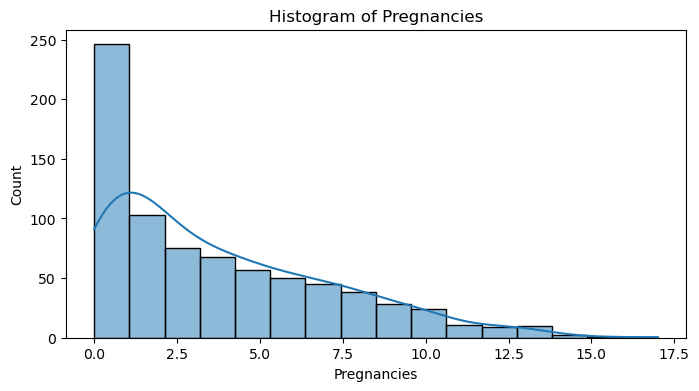

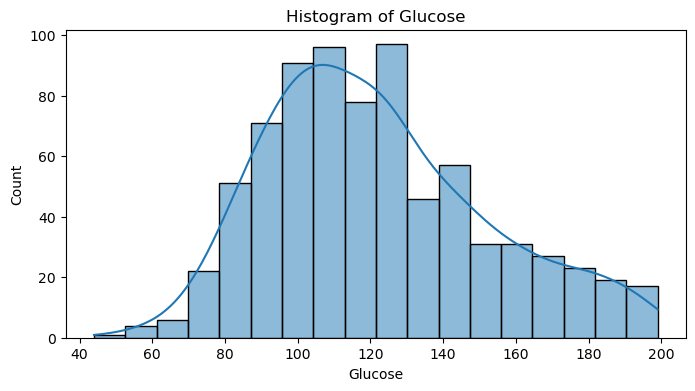

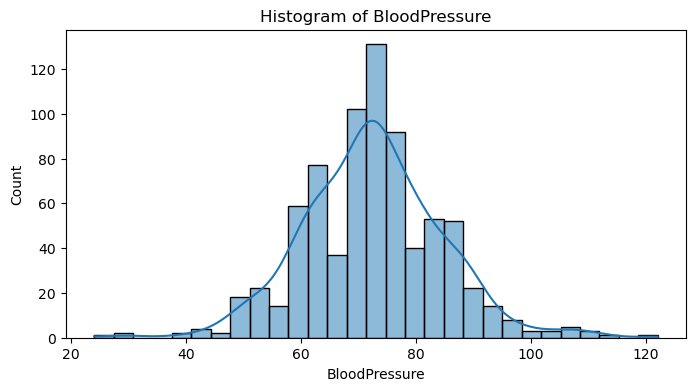

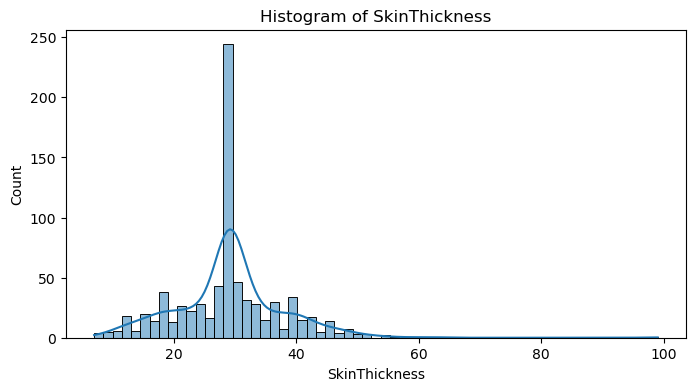

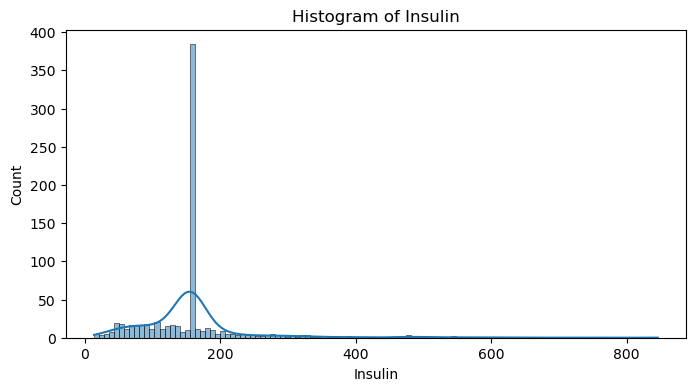

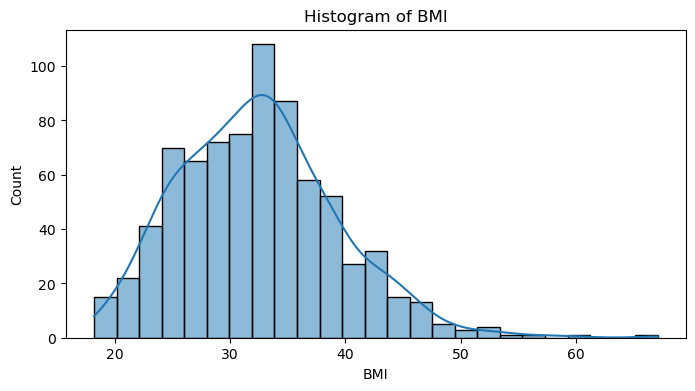

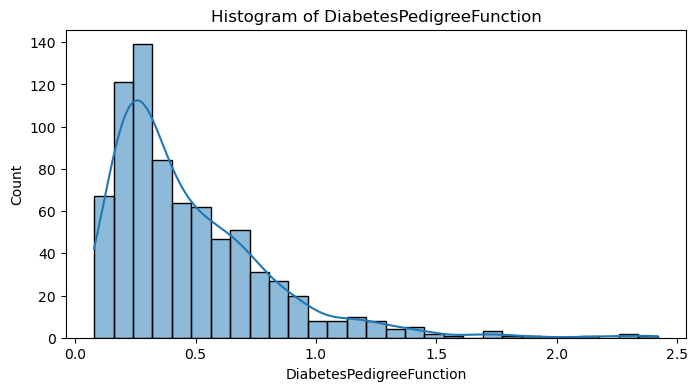

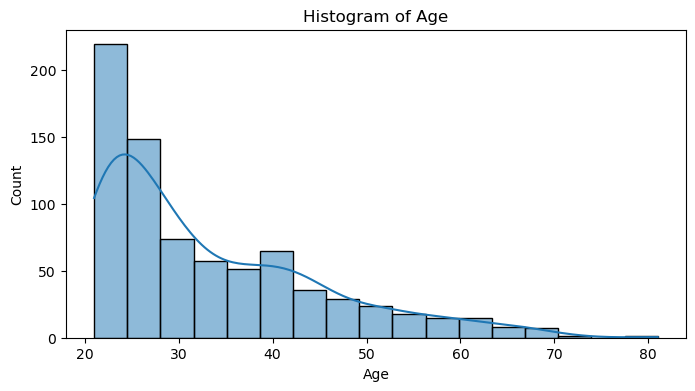

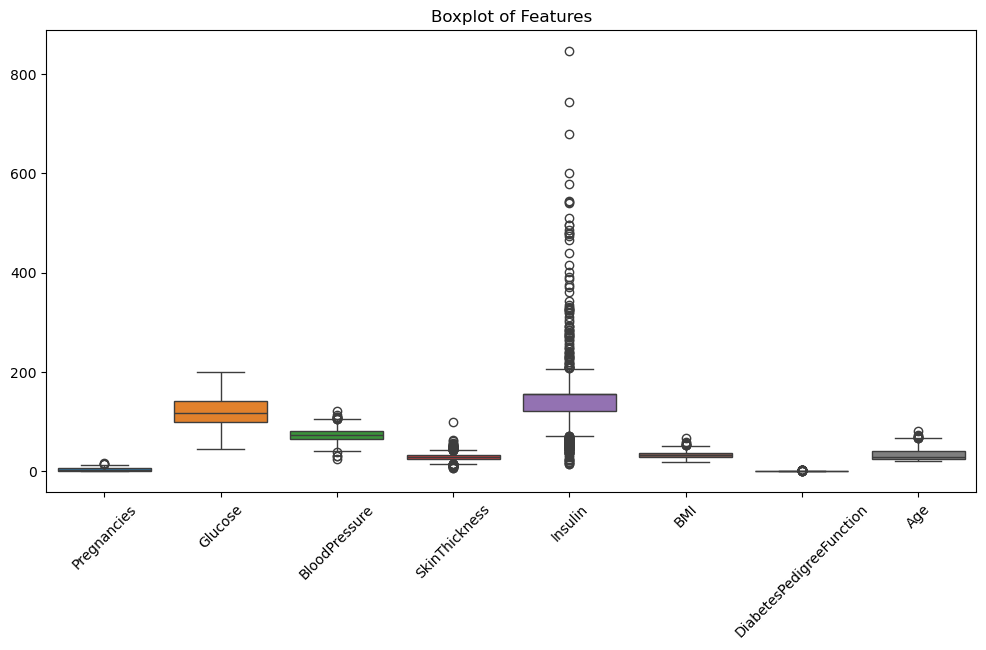

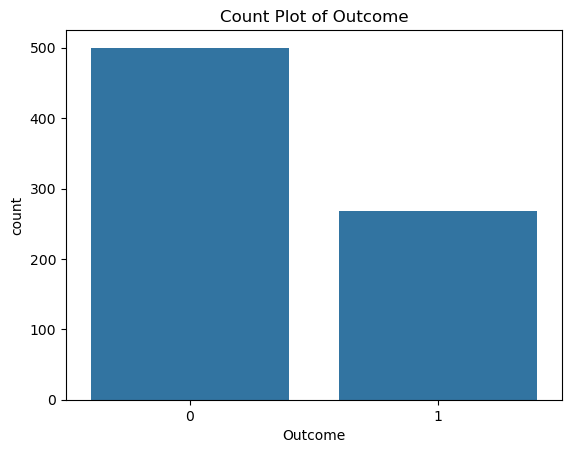

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram cho đặc trưng số
for col in df_dataset.columns[:-1]:  # Bỏ Outcome
    plt.figure(figsize=(8, 4))
    sns.histplot(df_dataset[col], kde=True)  # KDE cho phân bố mượt
    plt.title(f'Histogram of {col}')
    plt.show()

# Boxplot cho outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dataset.drop('Outcome', axis=1))
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

# Countplot cho Outcome
sns.countplot(x='Outcome', data=df_dataset)
plt.title('Count Plot of Outcome')
plt.show()

**Nhận xét:*
+ Histogram:

    - Glucose: Gần chuông (normal), đỉnh ~120, nhưng lệch nhẹ phải sau xử lý 0.
    - Insulin: Rất lệch phải, đỉnh ~150, đuôi dài đến 846 (cho thấy nhiều outliers).
    - Age: Lệch phải, tập trung 20–40 năm, hợp lý cho dân số trẻ.
    - Ý nghĩa: Xác nhận phân bố lệch ở Insulin, SkinThickness, cần log-transform nếu dùng mô hình nhạy với phân bố.


+ Boxplot:

    - Insulin: Nhiều outliers ở giá trị cao (>300 μU/mL).
    - BMI: Outliers ở >50 kg/m² (béo phì cực độ).
    - Glucose: Ít outliers (>190 mg/dL).
    - Ý nghĩa: Outliers ảnh hưởng đến phân tích đa biến, cần capping hoặc loại bỏ để cải thiện LightGBM.


+ Countplot cho Outcome:

    - Cột 0 cao hơn cột 1, xác nhận imbalance (65% vs 35%).
    - Ý nghĩa: Lớp 1 (tiểu đường) ít mẫu hơn, cần oversampling (SMOTE) để tránh thiên vị trong LightGBM.

**2. Phân tích đa biến**

**a.Non-Graphical Multivariate Analysis**

In [19]:

correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


**Nhận xét:**
+ Tương quan với outcome:
    - Glucose (0.467): Tương quan cao nhất, thuận chiều – nồng độ glucose cao (mg/dL) tăng nguy cơ tiểu đường.
    - BMI (0.293): Tương quan vừa, béo phì (kg/m² >30) liên quan mạnh.
    - Age (0.238), Pregnancies (0.222): Tương quan vừa, tuổi cao (năm) và số lần mang thai nhiều tăng rủi ro.
    - DiabetesPedigreeFunction (0.174), Insulin (0.131): Tương quan yếu, yếu tố di truyền và insulin (μU/mL) ít ảnh hưởng trực tiếp.
    - SkinThickness (0.075 mm), BloodPressure (0.065 mmHg): Rất yếu, ít giá trị dự đoán riêng lẻ.
+ Multicollinearity giữa features:

    -Pregnancies vs Age (0.544): Khá cao, tuổi cao liên quan đến mang thai nhiều – có thể gây vấn đề trong mô hình tuyến tính.
    - SkinThickness vs Insulin (0.437), BMI vs SkinThickness (0.393): Tương quan vừa, đều liên quan đến mô mỡ.
    - Không có corr rất cao (>0.8), nên không cần loại bỏ features ngay.


    - Ý nghĩa: Features quan trọng cho Outcome=1: Glucose, BMI, Age. Imbalance lớp làm giảm độ tin cậy của corr nếu không xử lý.

**b. Graphical Multivariate Analysis**

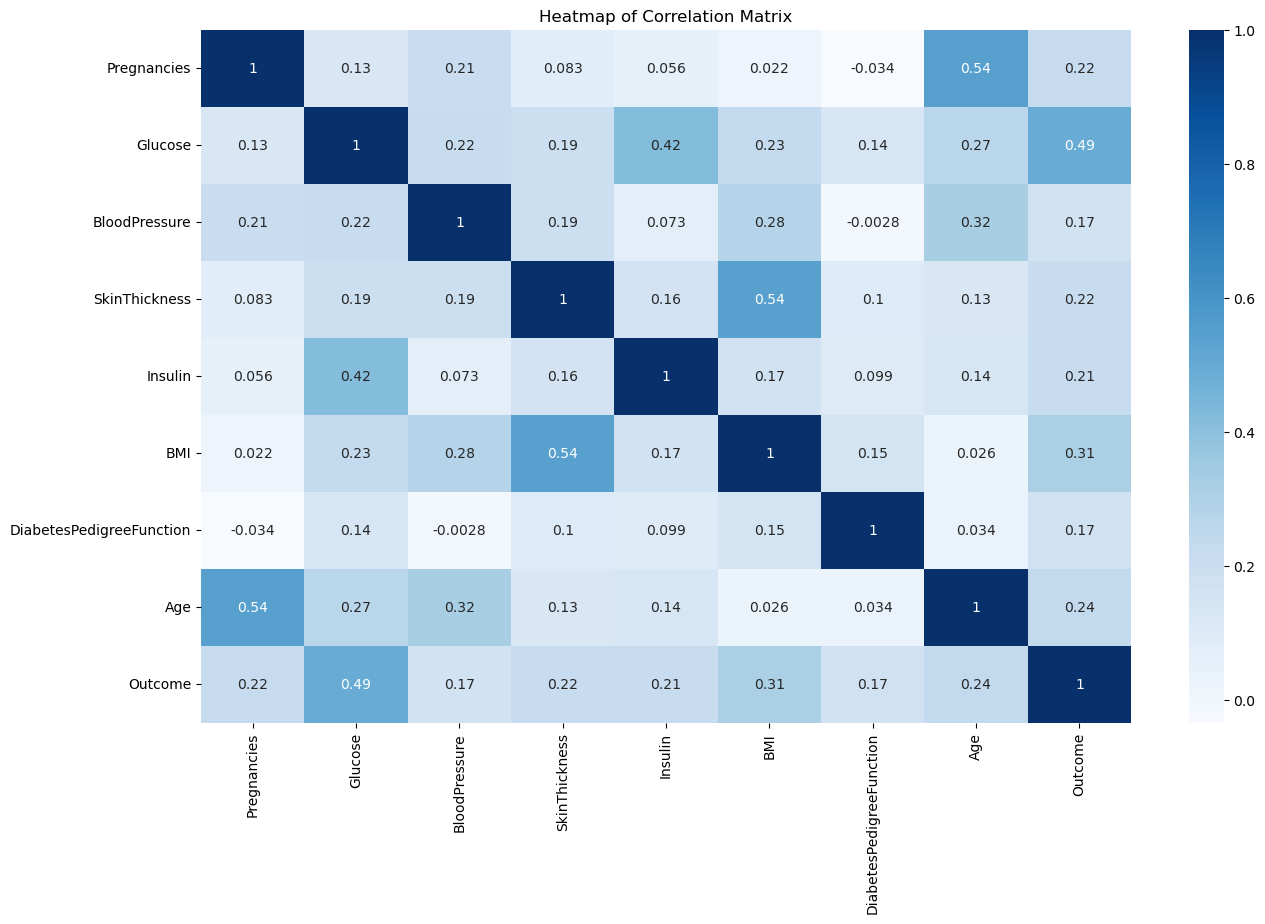

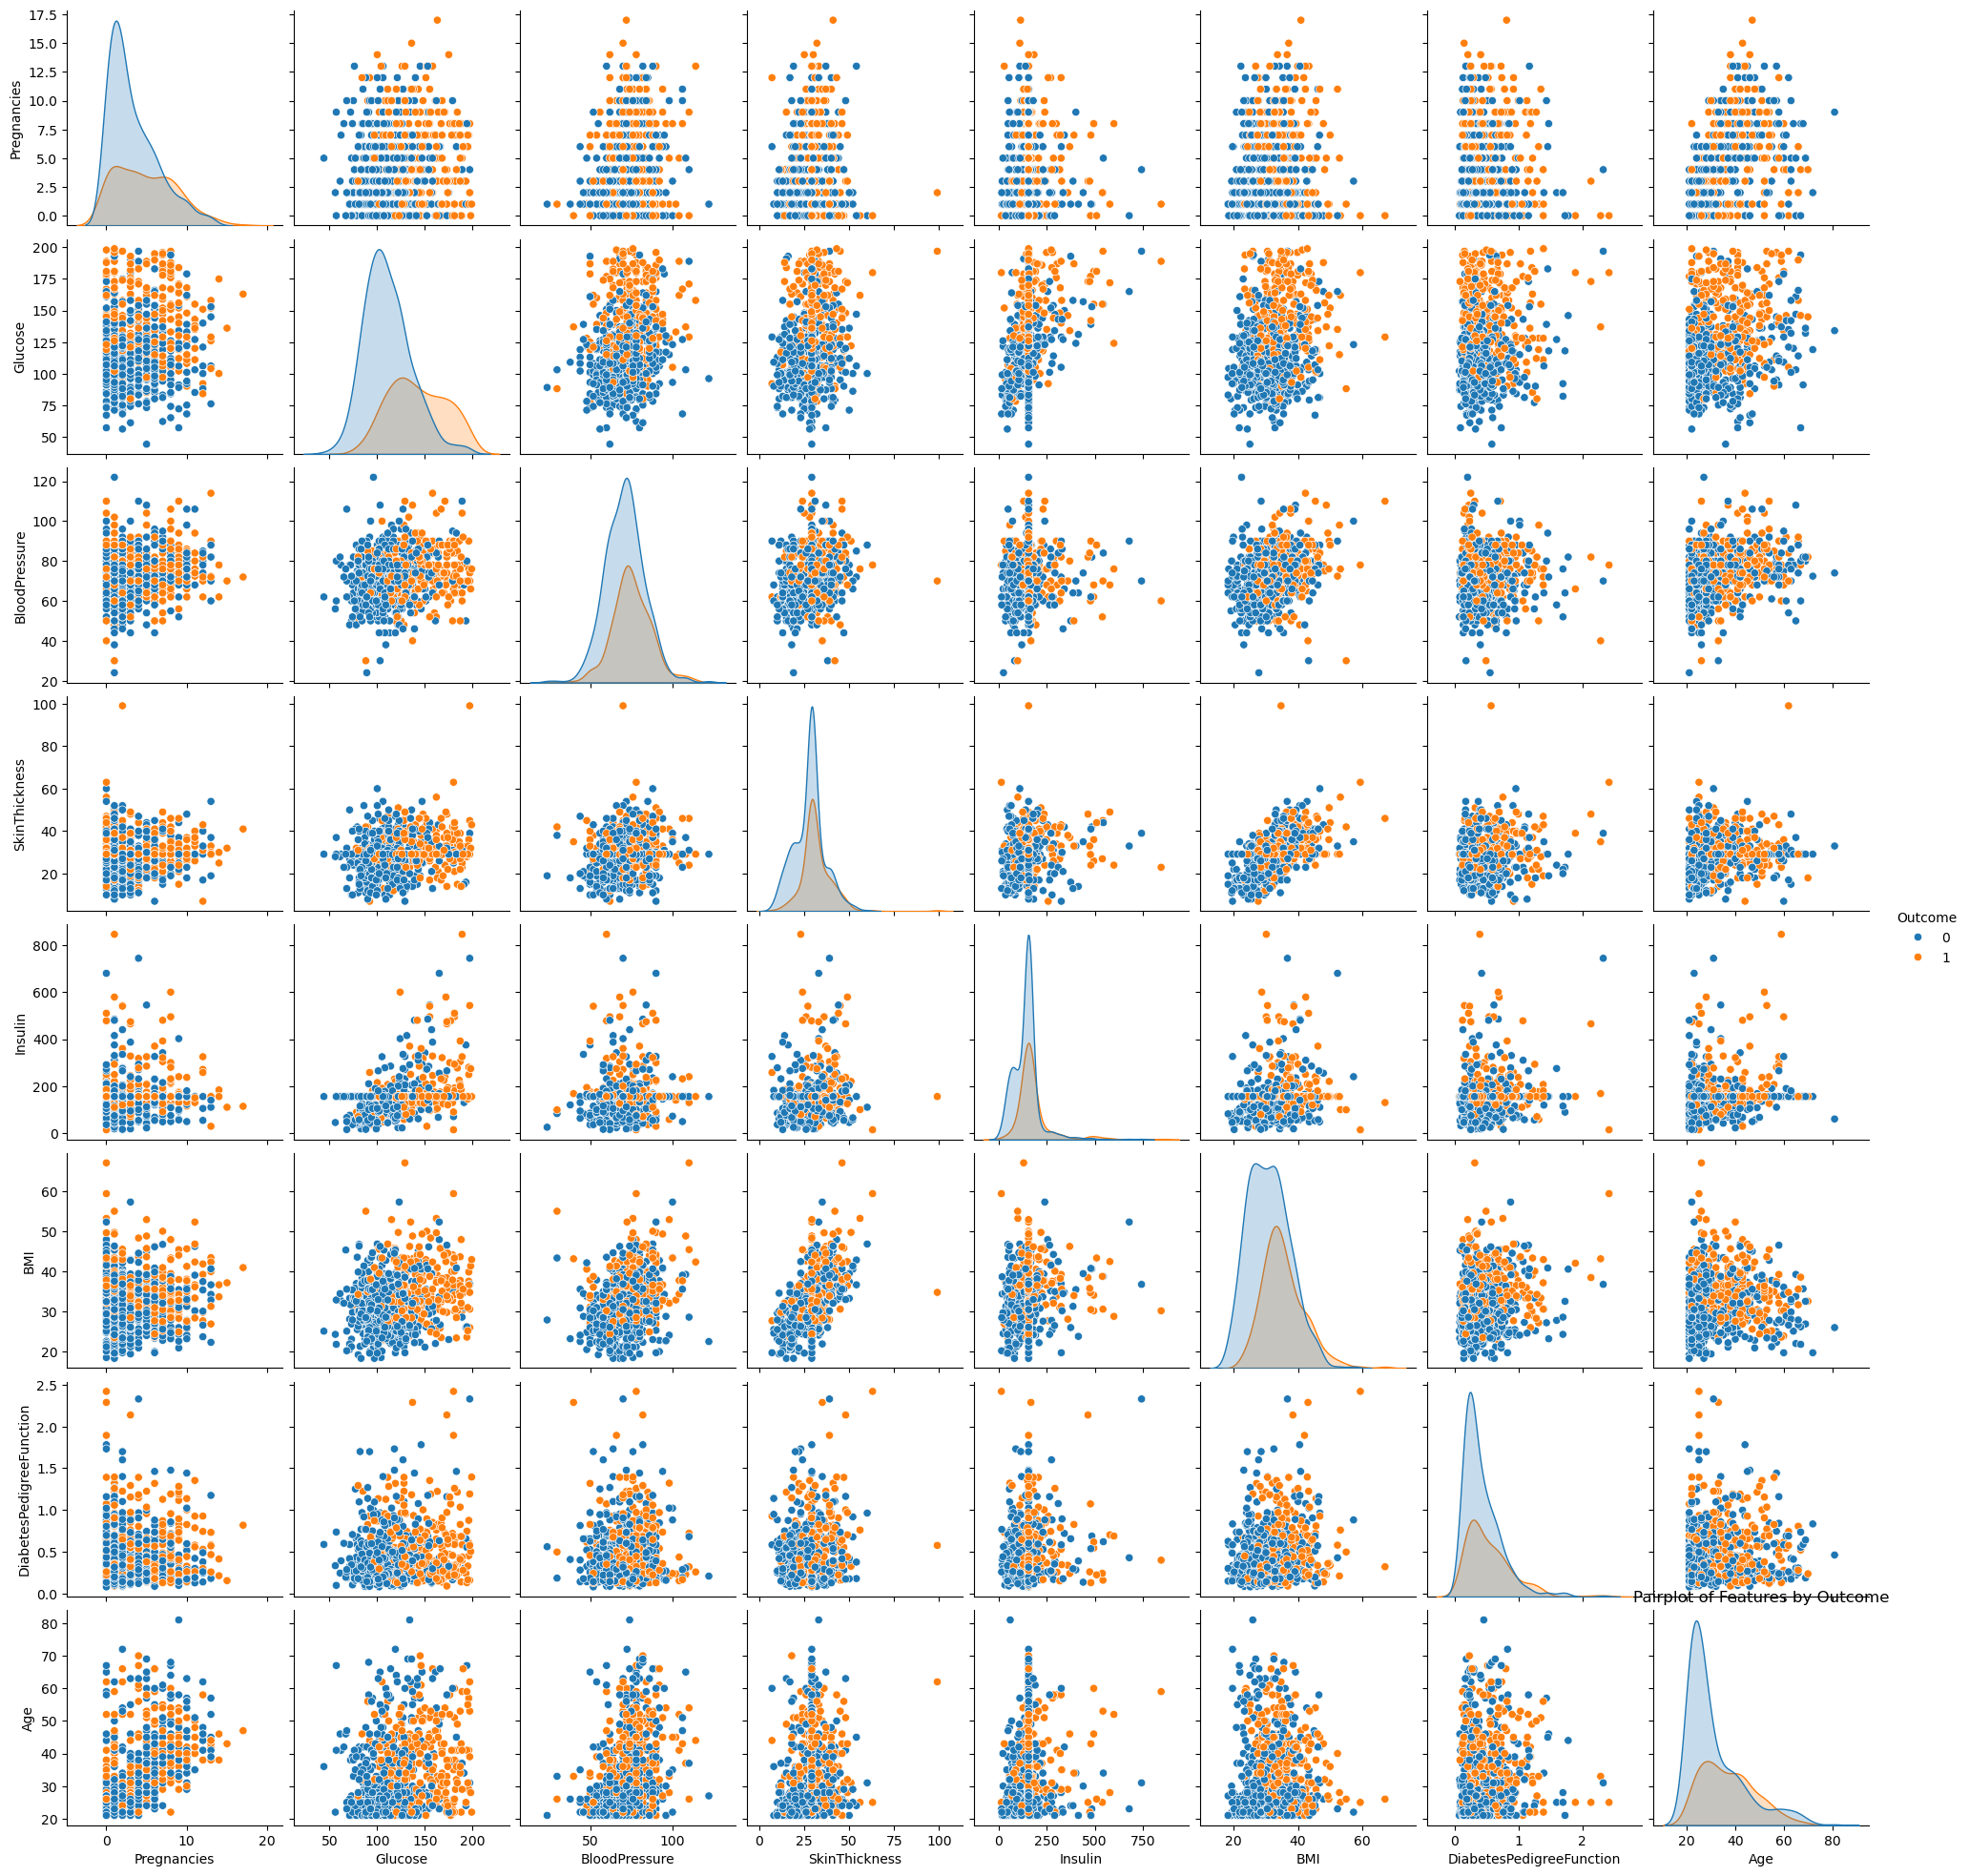

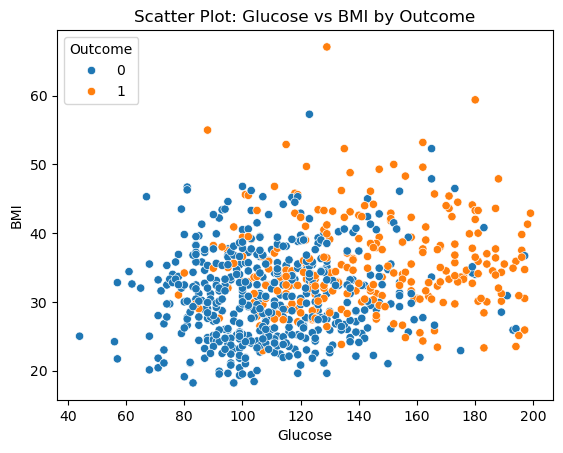

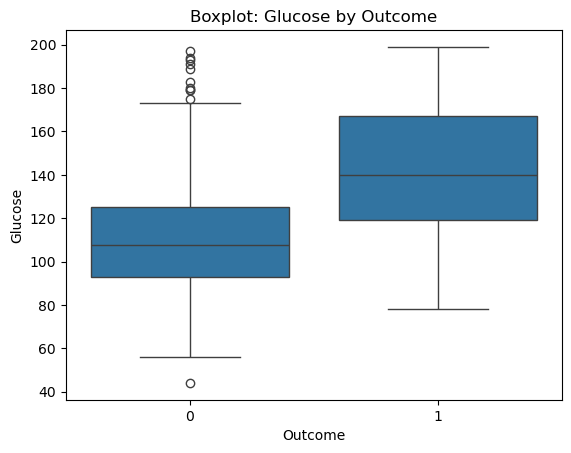

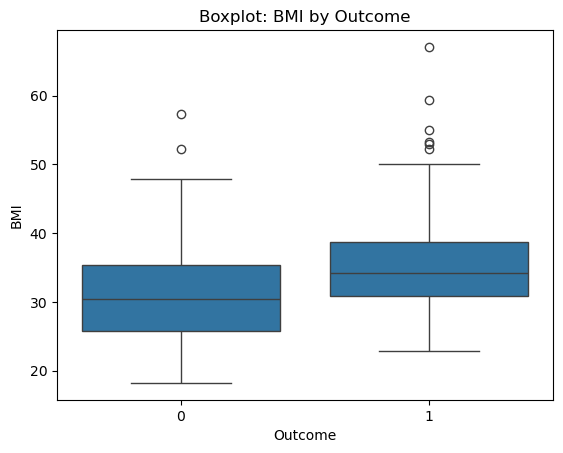

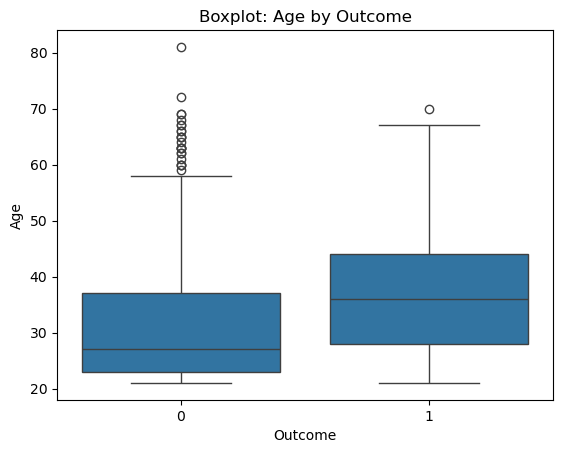

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap ma trận tương quan
fig = plt.figure(figsize=(15, 9))
sns.heatmap(df_dataset.corr(), cmap='Blues', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Pairplot (mối quan hệ giữa các cặp features với màu theo Outcome)
sns.pairplot(df_dataset, hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Features by Outcome')
plt.show()

# Scatter plot cho cặp quan trọng (Glucose vs BMI theo Outcome)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df_dataset)
plt.title('Scatter Plot: Glucose vs BMI by Outcome')
plt.show()

# Boxplot cho features quan trọng theo Outcome
for col in ['Glucose', 'BMI', 'Age']:
    sns.boxplot(x='Outcome', y=col, data=df_dataset)
    plt.title(f'Boxplot: {col} by Outcome')
    plt.show()